Assignment-6

1.Implement SGD on Linear Rigression -On Boston dataset

2.linear regression-Boston dataset

In [ ]:
%matplotlib inline
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [95]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [96]:
boston.data.shape

(506, 13)

In [97]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [98]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [103]:
import pandas as pd
bos=pd.DataFrame(boston.data)

In [104]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [105]:
bos['PRICE']= boston.target

In [106]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [107]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

# SGD impletation 

In [131]:
from scipy import spatial
from scipy.spatial.distance import euclidean

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [133]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
print(len(X_train))
print(len(X_test))

339
167


In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
print(len(X_train))
print(len(X_test))

339
167


In [136]:
def w_grad(w,b,x,y):
    
   
    w_1=(-2/len(x))*((x.T @ (y-(x @ (w.T))-b)))
    
    return w_1


In [137]:
def b_grad(w,b,x,y):
    
    b_1=((-2/len(x))*np.sum((y-(x.dot(w.T))-b)))
   
    return b_1


In [138]:
from scipy.spatial.distance import euclidean

In [157]:
def update_eq(w,b,r,x,y,iter,batch_size,tolerance=0.0001,max_iter=100000):
    '''
      To perform update function for SGD Optimization and store optimum value of W and B to the vari
    
    '''
    global optimal_w
    global optimal_b
    for i in range(max_iter):
            iter+=1
            s=np.random.randint(0,high=len(x),size=batch_size) # Batch size
            x2=x[s]
            y2=y[s,np.newaxis]
            w_new= w.T -(r * w_grad(w,b,x2,y2))
            w_new=w_new.T
            b_new=b-(r * b_grad(w,b,x2,y2))
            if(euclidean(w_new,w) <= tolerance and euclidean(b_new,b) <= tolerance):
                print(f'\n Converged after {iter} Iterations.. :) ')
                optimal_w= w.T
                optimal_b= b
                break
            elif(iter==max_iter):
                print(f'\n Convergence not happened within {max_iter} iterations')
                break
            else:
                w=w_new
                b=b_new
                r*=0.999


In [158]:
def grad_function(train,class2,size=100):
    '''
    to calculate SGD for linear regression with batch = size
    '''
    global iter
    learning_rate =10**-2
    weight=np.random.rand(1,(train.shape[1]))
    b=np.random.rand()
   #print(weight.shape)
   #print(b.shape)
    iter=0
    update_eq(weight,b,learning_rate,train,class2,iter,size)


In [159]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import r2_score

In [160]:
grad_function(X_train,Y_train,100)


 Converged after 4812 Iterations.. :) 


In [161]:
print(f'Optimal w is \n {optimal_w} \n\n and Optimal_b is {optimal_b}')

Optimal w is 
 [[-1.25942885]
 [ 0.77499048]
 [-0.37719255]
 [ 0.20868748]
 [-1.42099131]
 [ 2.84523523]
 [-0.38200089]
 [-2.76060942]
 [ 2.2006135 ]
 [-1.4584428 ]
 [-2.10931175]
 [ 1.03422331]
 [-3.29582212]] 

 and Optimal_b is 22.52690735442431


In [162]:
pred=(X_test.dot(optimal_w))+optimal_b
    

In [163]:
r2_score = r2_score(Y_test,pred)
mse = mean_squared_error(Y_test,pred)

print("r2_score is:",r2_score)
print("MSE is :",mse)

r2_score is: 0.6952592097053566
MSE is : 28.567577199958762


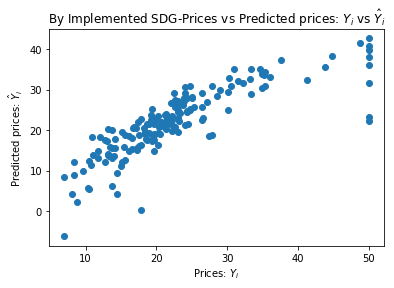

In [164]:
plt.scatter(Y_test, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("By Implemented SDG-Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

 #  Linear Regression with sklearn

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


rmse: 5.342412121468939
R2_score: 0.6955388005506419
mse: 28.541367275618253


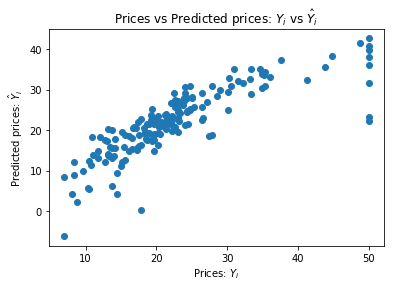

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train,Y_train)
pred1=reg.predict(X_test)
mse=mean_squared_error(Y_test, pred1)
rmse = (np.sqrt(mean_squared_error(Y_test, pred1)))
R2_score = r2_score(Y_test, pred1)
print("rmse:",rmse)

print("R2_score:",R2_score)

print("mse:",mse)

plt.scatter(Y_test, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


 # Conclution-

1.By comparing the results from manualy implemented SGD-linear Regression and Sklearn-linear Regression,

2.both results on test data are almost similar to the results obtained from Sklearn package and Implemented SGD.


 # Pretty Table

In [2]:
#from prettytable import prettyTable

from prettytable import PrettyTable
Table1=PrettyTable()
Table1.field_names=[  'Model',   'R2_score' ,  'mse']

Table1.add_row(['Sklearn lin.Reg',0.6955388005506419,28.541367275618253])

Table1.add_row(['Implemented SGD lin.Reg',0.6952592097053566,28.567577199958762])

print(Table1)

+-------------------------+--------------------+--------------------+
|          Model          |      R2_score      |        mse         |
+-------------------------+--------------------+--------------------+
|     Sklearn lin.Reg     | 0.6955388005506419 | 28.541367275618253 |
| Implemented SGD lin.Reg | 0.6952592097053566 | 28.567577199958762 |
+-------------------------+--------------------+--------------------+


# Extra Work...for assignment purpose you have given only above.Below this cell SGD sklearn simply i did...for learnig.

In [ ]:
#SGD in skleran

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)


#X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [175]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mse: 30.3223625666476
RMSE:  5.506574485707753
R2_score is : 0.6765402726495742


/home/sunitachoudhary103/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


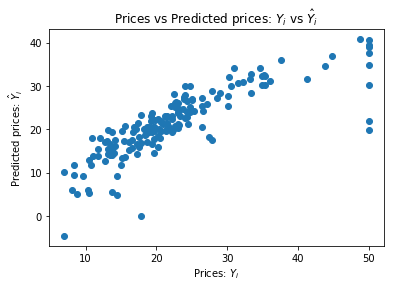

In [184]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

clf = linear_model.SGDRegressor()
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)


mse = mean_squared_error(Y_test,pred)
R2_score = r2_score(Y_test, pred)
print("mse:",mse)
print("RMSE: ", sqrt(mse))
print("R2_score is :",R2_score)
#err = pred-y_test
#total_error = np.dot(err,err)
#rmse_train = np.sqrt(total_error/len(pred))

plt.scatter(Y_test, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()





In [185]:
test_error=mean_squared_error(Y_test,pred)
test_error

30.3223625666476

[M]